In [ ]:
import keras
from keras.models import Sequential
from keras.layers import *
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
classes = os.listdir('/content/drive/MyDrive/brain_tumor/Training')

categorizing the classes


In [ ]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]

loading the training images 

In [ ]:
trainData = []
trainLabel = []
dim = (64, 64)
trainPath = "/content/drive/MyDrive/brain_tumor/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

meningioma_tumor
meningioma_tumor
glioma_tumor
glioma_tumor
pituitary_tumor
pituitary_tumor
no_tumor
no_tumor
(2870, 64, 64, 3)
(2870, 4)


loading the testing images

In [ ]:
testData = []
testLabel = []
dim = (64, 64)
testPath = "/content/drive/MyDrive/brain_tumor/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

meningioma_tumor
glioma_tumor
glioma_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
no_tumor
no_tumor
(394, 64, 64, 3)
(394, 4)


In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

model building

In [ ]:
discrimintor = Sequential()

discrimintor.add(keras.Input(shape=(64,64,3)))
normalization_layer
discrimintor.add(Conv2D(32, (3,3)))
discrimintor.add(Activation('relu'))
discrimintor.add(MaxPooling2D(pool_size=(2, 2)))


discrimintor.add(Conv2D(32, (3,3)))
discrimintor.add(Activation('relu'))
discrimintor.add(MaxPooling2D(pool_size=(2, 2)))
discrimintor.add(Conv2D(32, (3,3)))
discrimintor.add(Activation('relu'))
discrimintor.add(Dropout(rate=0.5))
discrimintor.add(MaxPooling2D(pool_size=(2, 2)))
discrimintor.add(Flatten())

discrimintor.add(Dense(64))
discrimintor.add(Activation('relu'))
discrimintor.add(Dropout(rate=0.5))
discrimintor.add(Dense(10))
discrimintor.add(Activation('relu'))
discrimintor.add(Dropout(rate=0.5))
discrimintor.add(Dense(4, activation='softmax'))

discrimintor.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

discrimintor._name="discriminator"
print(discrimintor.summary())

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)      

model training 

In [ ]:
history = discrimintor.fit(trainData, trainLabel,batch_size=128, epochs = 150,validation_data=(testData, testLabel))

Epoch 1/150
23/23 [==============================] - 1s 17ms/step - loss: 0.5304 - accuracy: 0.7244 - val_loss: 4.2086 - val_accuracy: 0.3985
Epoch 2/150
23/23 [==============================] - 0s 15ms/step - loss: 0.4852 - accuracy: 0.7436 - val_loss: 4.6365 - val_accuracy: 0.3909
Epoch 3/150
23/23 [==============================] - 0s 15ms/step - loss: 0.4967 - accuracy: 0.7554 - val_loss: 4.2601 - val_accuracy: 0.4036
Epoch 4/150
23/23 [==============================] - 0s 15ms/step - loss: 0.4825 - accuracy: 0.7488 - val_loss: 4.6704 - val_accuracy: 0.3909
Epoch 5/150
23/23 [==============================] - 0s 15ms/step - loss: 0.5099 - accuracy: 0.7456 - val_loss: 4.8718 - val_accuracy: 0.4086
Epoch 6/150
23/23 [==============================] - 0s 15ms/step - loss: 0.4709 - accuracy: 0.7638 - val_loss: 4.9438 - val_accuracy: 0.3985
Epoch 7/150
23/23 [==============================] - 0s 15ms/step - loss: 0.4842 - accuracy: 0.7554 - val_loss: 4.9289 - val_accuracy: 0.3883
Epoch 

saving the model 

In [ ]:
discrimintor.save("/content/drive/MyDrive/brain-tumor-model.h5")

ploting the loss and accuracy of the model

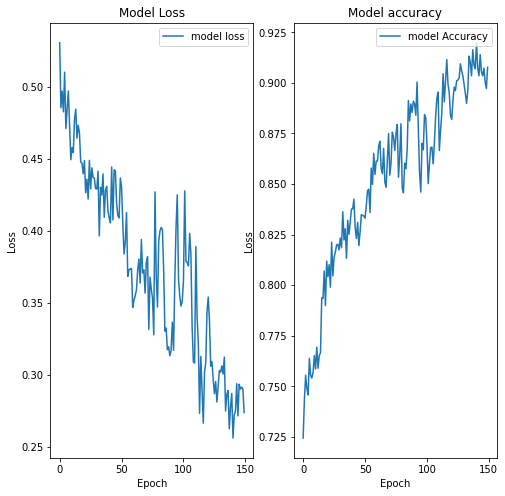

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['model loss'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['model Accuracy'], loc='upper right')
plt.show()

In [ ]:
discrimintor.evaluate(testData,testLabel)

13/13 [==============================] - 0s 3ms/step - loss: 15.6979 - accuracy: 0.3909


[15.697858810424805, 0.39086294174194336]

testing the model in pridcting the images 

97.59688973426819% Confidence This Is glioma_tumor


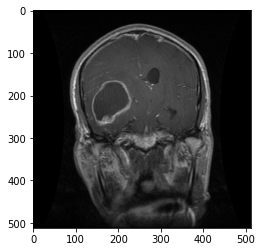

In [ ]:
img = Image.open('/content/drive/MyDrive/brain_tumor/Testing/glioma_tumor/image(70).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,64,64,3)
answ = discrimintor.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99939203262329% Confidence This Is pituitary_tumor


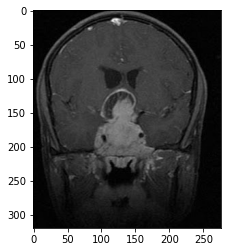

In [ ]:
img = Image.open('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/image(7).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,64,64,3)
answ = discrimintor.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

98.48920106887817% Confidence This Is meningioma_tumor


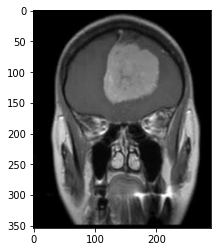

In [ ]:
img = Image.open('/content/drive/MyDrive/brain_tumor/Testing/meningioma_tumor/image(65).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,64,64,3)
answ = discrimintor.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

92.58139133453369% Confidence This Is no_tumor


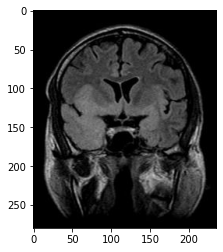

In [ ]:
img = Image.open('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/image(5).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,64,64,3)
answ = discrimintor.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))